<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Rechardian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometrics or Machine Learning: Using the Ricardian Method to Analyze the Impact of Climate Change on Agriculture

# 1 .Abstract

This article compares the performance of an econometric model and a machine learning model in analyzing the impact of climate change on net revenue per hectare. The econometric model, using polynomial regression of degree 2, was applied to the full dataset, yielding an R-squared value of 30%. To improve upon this model, a machine learning approach was employed, incorporating polynomial regression with hyperparameter optimization via grid search, and using 80% of the data for training. Despite these efforts, the machine learning model also produced an R-squared value of 30% on the training dataset. This outcome suggests that, although machine learning techniques were utilized to enhance model performance, no significant improvement in explanatory power was achieved when compared to the econometric model applied to the full dataset


# 3.	Introduction

Throughout history, humanity has sought ways to predict the future to minimize risks and better prepare for uncertainties. From fortune tellers to traditional fate forecasters, people have always looked for insights into what lies ahead. In the modern world, this quest has evolved into scientific methods, using theories and past trends to anticipate future events with varying degrees of certainty. One such approach is econometrics, which applies economic theories to statistical methods, primarily to analyze events in the economic sphere.

Despite its widespread use, econometrics has notable limitations. It requires a solid understanding of economic assumptions and advanced statistical knowledge. Furthermore, econometric software often struggles to manage the scale and complexity of big data.
Machine learning, on the other hand, has transformed predictive analysis, making it more accessible. With just a basic understanding of statistics and programming, individuals can practice machine learning. Unlike econometrics, machine learning is well-suited to handle big data, thanks to advancements in data science and computational technology.

This article does not aim to compare econometrics and data science as fields but rather to evaluate the predictive power of both methods. Using the paper "Economic Impact of Climate Change on Crop Production in Ethiopia: Evidence from Cross-section Measures" by Temesgen Deressa and Rashid Hassan (2009) [Journal Article](https://academic.oup.com/jae/article-abstract/18/4/529/743953?redirectedFrom=fulltext), the results derived from econometric methods will be compared with those obtained through machine learning. By applying modern machine learning techniques to the same data, this analysis provides  a practical perspective on how these approaches perform in generating insights.

# 4.	Data used

This study gathered household data from 1,000 farmers across Ethiopia's agro-ecological zones. Farmers were randomly selected from 50 districts, with 20 farmers per district, covering areas from Oromia's highlands to Afar's lowlands. Interviews were conducted during the 2003/2004 production season, focusing on small-scale, rain-fed farming households, which make up over 95% of Ethiopian farmers. Temperature data came from U.S. Department of Defense satellite records, precipitation from ARTES, soil data from the FAO, and hydrological data from the University of Colorado's Africa-specific model, enabling a comprehensive analysis of agricultural conditions.


# 5.	Methodology: The Ricardian method

The Ricardian method, introduced by Mendelsohn et al. (1994), evaluates the economic impact of climate on agriculture by correlating land values or net revenue with environmental variables. Based on David Ricardo's principle that land values reflect productivity under perfect competition, the method considers both the direct effects of climate on crop yields and indirect adaptations, such as input substitution or shifts in agricultural activities.
Land values, representing the discounted sum of future profits, inherently capture the impact of climate as a determinant of productivity. By regressing land values or net revenue on environmental, economic, and soil variables, the method estimates the marginal contribution of each factor to agricultural income.
The model expresses net revenue as a function of climate variables (e.g., temperature and precipitation), economic factors (e.g., livestock ownership), soil properties, and input costs. To account for the nonlinear relationship between climate and revenue, it incorporates both linear and quadratic terms for climate variables. This approach assumes that farmers optimize net revenues within the constraints of climate, soil, and economic conditions.
In this machine learning experiment, the polynomial method uses grid search to determine the optimal polynomial degree. While this demonstration allows for flexibility, the relationship between crop yields and climatic variables is typically quadratic in nature.



# 6 . Machine Learning Approch

Import libraries and data

In [137]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from tabulate import tabulate
from scipy import stats


In [138]:

# Define the file path
file_path = r"/content/Ricardian.dta"

# Check if the file exists and load the dataset
print(f"Checking the existence of: {file_path}")
path = Path(file_path)

if path.is_file():
    print(f"{file_path} file exists.")
    # Load the Stata file into a pandas DataFrame
    df = pd.read_stata(file_path)
else:
    print(f"{file_path} does not exist.")

# Select relevant columns for analysis
df = df[['wintertemperature', 'springtemperature', 'summertemperature', 'falltemperature',
         'winterprecipitation', 'springprecipitation', 'summerprecipitation', 'fallprecipitation', 'distancetomarketkm',
         'livestockowner', 'education', 'hhsize', 'nitosoles', 'lithosoles', 'netrevenue']]




Checking the existence of: /content/Ricardian.dta
/content/Ricardian.dta file exists.


In [143]:
# Inspect the first few rows of the DataFrame
df.head()


,wintertemperature,springtemperature,summertemperature,falltemperature,winterprecipitation,springprecipitation,summerprecipitation,fallprecipitation,distancetomarketkm,livestockowner,education,hhsize,nitosoles,lithosoles,netrevenue
0,23.214899,26.831949,27.921021,24.865471,22.042219,48.90667,115.927803,56.873329,18.0,1.0,15.0,10.0,0.0,0.7,NaN
1,23.214899,26.831949,27.921021,24.865471,22.042219,48.90667,115.927803,56.873329,18.0,1.0,15.0,8.0,0.0,0.7,531.93158
2,23.214899,26.831949,27.921021,24.865471,22.042219,48.90667,115.927803,56.873329,18.0,1.0,15.0,6.0,0.0,0.7,NaN
3,23.214899,26.831949,27.921021,24.865471,22.042219,48.90667,115.927803,56.873329,18.0,1.0,4.0,14.0,0.0,0.7,NaN
4,23.214899,26.831949,27.921021,24.865471,22.042219,48.90667,115.927803,56.873329,18.0,2.0,0.0,6.0,0.0,0.7,NaN


In [144]:

# Check for null values and display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wintertemperature    998 non-null    float32
 1   springtemperature    998 non-null    float32
 2   summertemperature    998 non-null    float32
 3   falltemperature      998 non-null    float32
 4   winterprecipitation  998 non-null    float32
 5   springprecipitation  998 non-null    float32
 6   summerprecipitation  998 non-null    float32
 7   fallprecipitation    998 non-null    float32
 8   distancetomarketkm   862 non-null    float32
 9   livestockowner       980 non-null    float32
 10  education            980 non-null    float32
 11  hhsize               951 non-null    float64
 12  nitosoles            999 non-null    float32
 13  lithosoles           999 non-null    float32
 14  netrevenue           646 non-null    float32
dtypes: float32(14), float64(1)
memory usage:

In [145]:

# Get a statistical summary of the data
df.describe()

,wintertemperature,springtemperature,summertemperature,falltemperature,winterprecipitation,springprecipitation,summerprecipitation,fallprecipitation,distancetomarketkm,livestockowner,education,hhsize,nitosoles,lithosoles,netrevenue
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,862.000000,980.000000,980.000000,951.000000,999.000000,999.000000,646.000000
mean,19.743475,21.420321,18.961662,18.237236,21.228441,72.390427,136.359314,75.321976,7.969838,0.932653,3.411225,6.080967,0.545546,0.080080,1213.024414
std,2.406933,2.958192,3.708238,3.177575,7.193749,23.136938,67.194824,27.697132,11.037119,0.337559,4.434210,2.378581,8.618522,1.273435,1470.544067
min,16.860491,17.511150,14.547190,14.399990,8.528889,34.980000,39.680000,32.487782,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-496.376495
25%,17.626190,18.776529,15.666680,15.499690,16.107780,47.224442,79.158890,56.873329,2.000000,1.000000,0.000000,4.000000,0.000000,0.000000,142.435669
50%,19.702980,20.784859,17.689270,17.669590,20.487780,73.705559,141.257797,69.971123,5.000000,1.000000,1.000000,6.000000,0.100000,0.000000,752.755249
75%,22.182840,24.251949,21.330980,20.387899,27.347780,92.588890,201.815598,97.249992,10.000000,1.000000,6.000000,8.000000,0.500000,0.000000,1941.120239
max,25.126760,26.831949,27.921021,24.865471,32.258888,107.720001,228.187805,120.775597,150.000000,2.000000,15.000000,17.000000,272.500000,40.000000,7911.394043


In [146]:
# Check missing values
df.isna().sum()

,0
wintertemperature,1
springtemperature,1
summertemperature,1
falltemperature,1
winterprecipitation,1
springprecipitation,1
summerprecipitation,1
fallprecipitation,1
distancetomarketkm,137
livestockowner,19


In [147]:
# Handle missing values by filling them with the median
df.fillna(df.median(), inplace=True)


# 5. Data Visualizations

A correlation heatmap highlights the strength and direction of correlations between climatic variables and net revenue, providing a clear overview of interrelationships. The violin plot for summer precipitation shows the distribution of net revenue across different precipitation levels, revealing its potential impact. The box plot for summer temperature summarizes the distribution of net revenue, highlighting key statistics like median and outliers.

Scatter plots for winter temperature and winter precipitation visualize potential trends in net revenue, offering insights into how these factors might influence revenue. These visualizations collectively provide a concise view of how climatic conditions, both in summer and winter, impact net revenue.

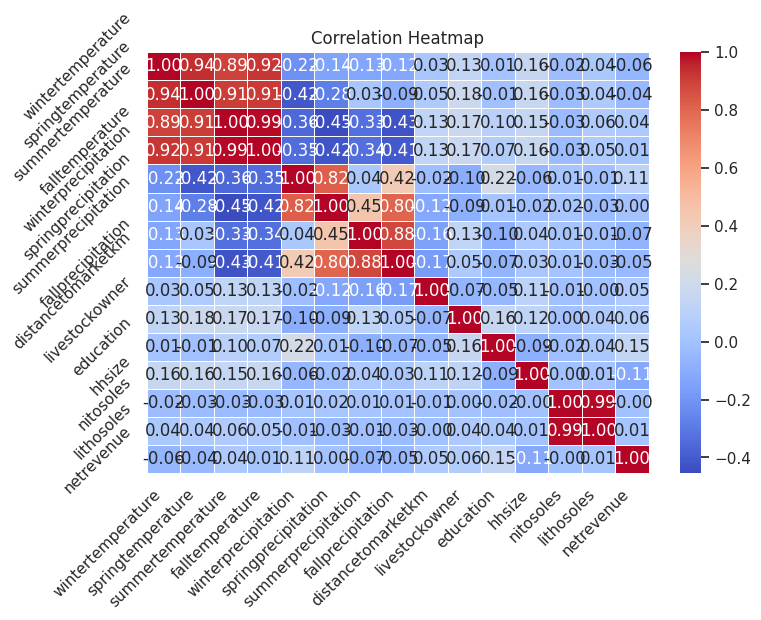

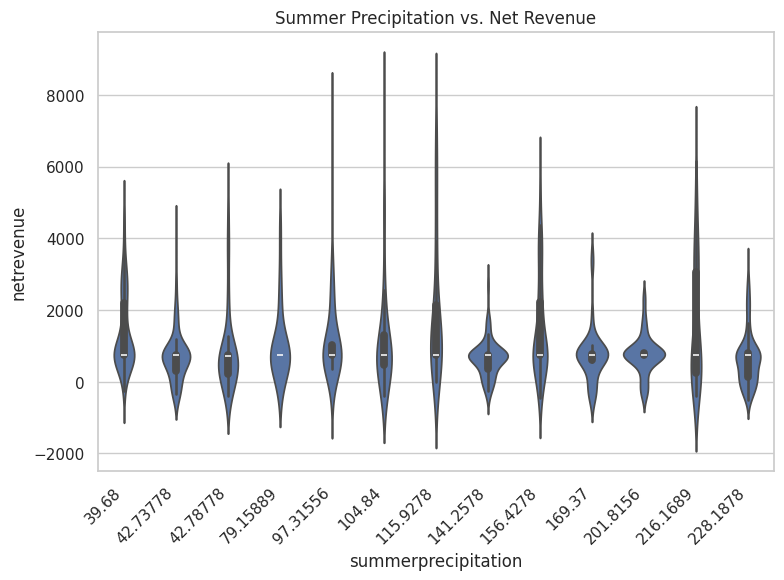

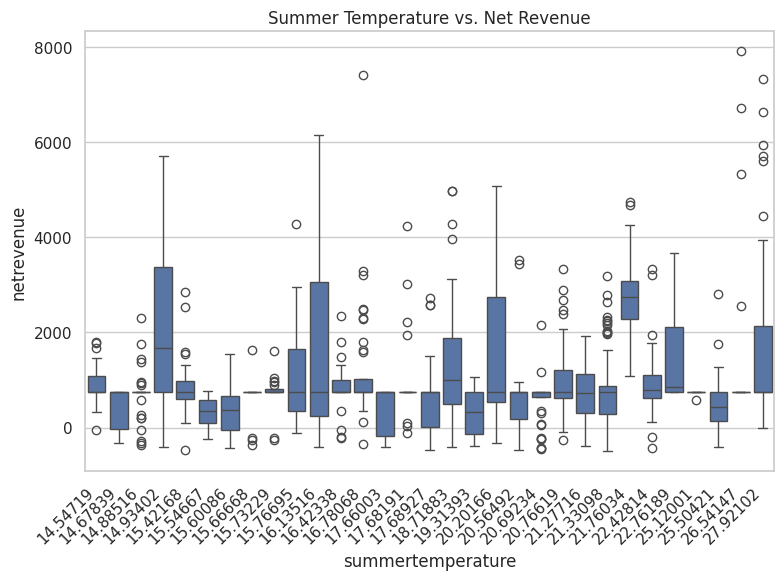

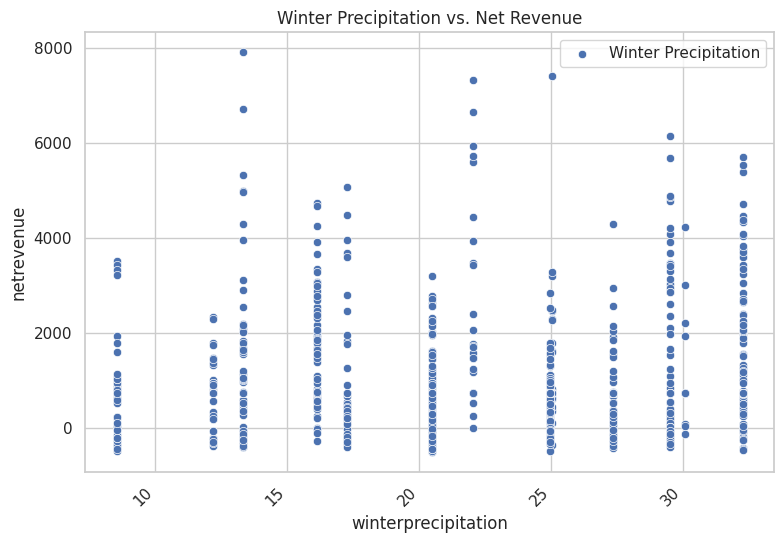

In [153]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Heatmap to show correlation matrix

plt.figure(figsize=(8, 6))  # Adjust the figure size for the heatmap
corr_matrix = df.corr()  # Calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=45, ha='right')  # Rotate y-axis labels for readability
plt.tight_layout()  # Adjust layout to ensure labels are visible
plt.subplots_adjust(bottom=0.2)
plt.show()


# Violin plot for Summer Precipitation vs. Net Revenue
plt.figure(figsize=(8, 6))
sns.violinplot(x='summerprecipitation', y='netrevenue', data=df)
plt.title('Summer Precipitation vs. Net Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


# Box plot for Summer Temperature vs. Net Revenue
plt.figure(figsize=(8, 6))
sns.boxplot(x='summertemperature', y='netrevenue', data=df)
plt.title('Summer Temperature vs. Net Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Scatter plot for Winter Precipitation vs. Net Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='winterprecipitation', y='netrevenue', data=df, color='b', label='Winter Precipitation')
plt.title('Winter Precipitation vs. Net Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()



In [149]:


# Separate the independent variables (X) and dependent variable (y)
# Separate the independent variables (X) by dropping 'netrevenue'
X = df.drop(columns=['netrevenue'])  # Drop 'netrevenue' column from the dataframe

y = df['netrevenue']


In [150]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning (Polynomial degree and alpha for Ridge)
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],  # Trying polynomial degrees 1 through 5
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]  # Trying different regularization strengths for Ridge regression
}

# Create a pipeline with PolynomialFeatures and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



In [151]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the results
print("Best Model Hyperparameters:", best_params)
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_)

# Optionally, evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




Best Model Hyperparameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 100.0}
Best Cross-Validation Score (Negative MSE): -1374124.990127303


In [152]:
# Store the results in a dictionary
results = {
    "Metric": ["Best Polynomial Degree", "Best Alpha (Regularization)", "Best Cross-Validation Score (Negative MSE)",
               "Test Mean Squared Error", "Test R-squared", "Training Mean Squared Error", "Training R-squared"],
    "Value": [2, 100.0, -1374124.990127303, 1015206.4372773932, 0.27352428743750645, 1017870.7961569298, 0.299510425359929]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Round the numeric values to 3 decimal places
results_df['Value'] = results_df['Value'].round(3)

# Convert the DataFrame into a list of lists for tabulate
table = results_df.values.tolist()

# Create the table with headers and apply a beautiful format
headers = ["Metric", "Value"]

# Print the table using tabulate for better readability
print(tabulate(table, headers=headers, tablefmt="fancy_grid", floatfmt=".3f"))




╒════════════════════════════════════════════╤══════════════╕
│ Metric                                     │        Value │
╞════════════════════════════════════════════╪══════════════╡
│ Best Polynomial Degree                     │        2.000 │
├────────────────────────────────────────────┼──────────────┤
│ Best Alpha (Regularization)                │      100.000 │
├────────────────────────────────────────────┼──────────────┤
│ Best Cross-Validation Score (Negative MSE) │ -1374124.990 │
├────────────────────────────────────────────┼──────────────┤
│ Test Mean Squared Error                    │  1015206.437 │
├────────────────────────────────────────────┼──────────────┤
│ Test R-squared                             │        0.274 │
├────────────────────────────────────────────┼──────────────┤
│ Training Mean Squared Error                │  1017870.796 │
├────────────────────────────────────────────┼──────────────┤
│ Training R-squared                         │        0.300 │
╘═══════

# 7. Conclusion

This article compares the performance of an econometric model and a machine learning model in analyzing the impact of climate change on net revenue per hectare. The econometric model, using polynomial regression of degree 2, was applied to the full dataset, yielding an R-squared value of 30%. To improve upon this model, a machine learning approach was employed, incorporating polynomial regression with hyperparameter optimization via grid search, and using 80% of the data for training. Despite these efforts, the machine learning model also produced an R-squared value of 30% on the training dataset, with a test R-squared of 27.4% and a training R-squared of 30%.

These results suggest that, although machine learning techniques were utilized to enhance model performance, no significant improvement in explanatory power was achieved when compared to the econometric model applied to the full dataset. The machine learning model’s cross-validation score was -1,374,124.990, indicating relatively large prediction errors. Furthermore, the training Mean Squared Error (MSE) was 1,017,870.796, and the test MSE was 1,015,206.437, highlighting that the model captures some underlying patterns but still leaves substantial unexplained variance. This outcome implies that, despite the potential of machine learning methods, the performance gains in this particular case were marginal when compared to the more traditional econometric approach.

# 8.Refrences

Temesgen Tadesse Deressa and Rashid M. Hassan, "Economic Impact of Climate Change on Crop Production in Ethiopia: Evidence from Cross-section Measures," Journal of African Economies, Volume 18, Issue 4, August 2009, Pages 529–554. https://doi.org/10.1093/jae/ejp002

Mendelsohn, R., Nordhaus, W., and Shaw, D. (1994). "The Impact of Global Warming on Agriculture: A Ricardian Analysis," American Economic Review, Volume 84, Pages 753–771.
